<a href="https://colab.research.google.com/github/bernebas/Bernebas/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 5

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Github link: [Github link](https://github.com/bernebas/Bernebas/blob/main/HW5.ipynb)


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).


<hr><hr>

# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

<hr>

## Ans.
 **Estimate:**  
$$\hat{N} = 48$$

**Reasoning (Method of Moments / Lincoln–Petersen):**  

If each bird (tagged or untagged) visits with the same rate, then the fraction of tagged birds among visitors should match the fraction of tagged birds in the overall population:

$$
\frac{\text{tagged among visitors}}{\text{total visitors}}
\approx
\frac{\text{tagged in population}}{\text{total population}}
=
\frac{10}{N}.
$$

Using the observed weekly averages:
$$
\text{tagged among visitors} = 6, \quad
\text{total visitors} = 28.8,
$$

we set up the equation:
$$
\frac{6}{28.8} = \frac{10}{N}.
$$

Solving for \( N \):
$$
N = \frac{28.8 \times 10}{6} = 48.
$$

**Final estimate:**  
$$
\boxed{N = 48}
$$



<hr>

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

<hr>

## Ans.
**Estimate (Maximum Likelihood Estimator):**  
We observe:
- \( n = 20 \) unique birds at the feeder  
- \( k = 4 \) of them are tagged  
- \( M = 10 \) tagged in total population  
- \( N = ? \) total population size (unknown)

---

**Step 1.** Model the number of tagged birds among the observed sample using a **hypergeometric distribution**:

$$
P(K = k \mid N) = \frac{\binom{M}{k}\,\binom{N - M}{n - k}}{\binom{N}{n}}
$$

---

**Step 2.** The **MLE** \(\hat{N}\) maximizes this likelihood.  
A standard result (or via proportional reasoning) is that the expected proportion of tagged birds in the sample equals the population proportion:

$$
\frac{k}{n} \approx \frac{M}{N}.
$$

---

**Step 3.** Solve for \( N \):

$$
N = \frac{M \, n}{k}
$$

Substitute the numbers:

$$
N = \frac{10 \times 20}{4} = 50.
$$

---

**Final Estimate (MLE):**  
$$
\boxed{\hat{N} = 50}
$$



In [60]:
from math import comb
import numpy as np

# Given data
M = 10   # total tagged birds
n = 20   # unique birds observed
k = 4    # tagged birds observed

def Mle(N, M, n, k):

    if N < max(M, n) or k > M or (n - k) > (N - M):
        return 0.0
    return comb(M, k) * comb(N - M, n - k) / comb(N, n)


N_min, N_max = max(M, n), 500  # wide upper bound
N_vals = np.arange(N_min, N_max + 1)
liks = np.array([Mle(N, M, n, k) for N in N_vals])

# MLE
N_hat = int(N_vals[np.argmax(liks)])
print("MLE estimate of total hawk population (N̂):", N_hat)


MLE estimate of total hawk population (N̂): 49


<hr><hr>

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

<hr>

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?

<hr>

##Ans



$$
N \sim \text{Geometric}(p), \quad P(N = k) = (1 - p)^k p, \quad k \ge 0.
$$

Because the data are **censored at 40 servings**, we only observe

$$
Y = \min(N, 40).
$$

---

### PMF of \( Y \)

For \( y = 0, 1, \ldots, 39 \):

$$
P(Y = y) = P(N = y) = (1 - p)^y p.
$$

For \( y = 40 \) (the censored value):

$$
P(Y = 40) = P(N \ge 40)
= \sum_{k = 40}^{\infty} (1 - p)^k p
= (1 - p)^{40}.
$$

---

###  Final PMF

$$
P(Y = y) =
\begin{cases}
(1 - p)^y p, & y = 0, 1, \ldots, 39, \\\\[6pt]
(1 - p)^{40}, & y = 40.
\end{cases}
$$




<hr>


**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.

<hr>

## Ans.


In [61]:
import pandas as pd

data = pd.read_csv("Soup_sales_data.csv")
Y = data["Y"]

cap = 40

below_cap = Y[Y < cap]
n_uncensored = len(below_cap)
n_censored = (Y == cap).sum()

total_uncensored = below_cap.sum()

p_hat = n_uncensored / (total_uncensored + cap * n_censored + n_uncensored)

print(f"Total days: {len(Y)}")
print(f"Uncensored days (<40): {n_uncensored}")
print(f"Censored days (=40): {n_censored}")
print(f"MLE of p: {p_hat:.4f}")


Total days: 100
Uncensored days (<40): 66
Censored days (=40): 34
MLE of p: 0.0268


<hr><hr>

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

<hr>

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.

<hr>

## Ans.

The probability that at least two people share a birthday among \( n \) people is:

$$
P(\text{at least one shared birthday})
= 1 - P(\text{no shared birthday})
= 1 - \frac{365!}{(365 - n)! \, 365^n}
= 1 - \prod_{k=0}^{n-1} \frac{365 - k}{365}.
$$


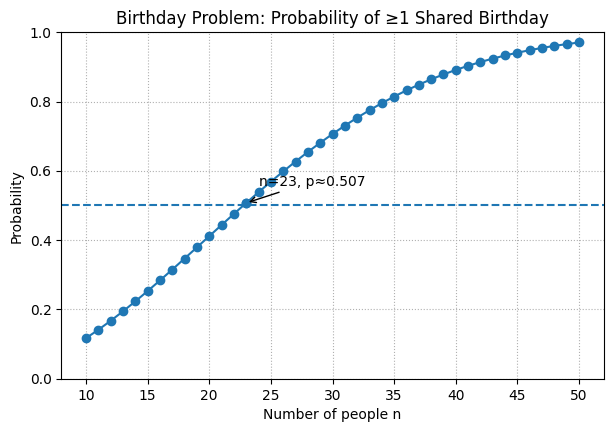

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import prod


n_vals = np.arange(10, 51)

def p_at_least_one_match(n, days=365):
    terms = [(days - k)/days for k in range(n)]
    return 1 - prod(terms)

p_vals = np.array([p_at_least_one_match(n) for n in n_vals])

n_half = n_vals[np.argmax(p_vals >= 0.5)] if np.any(p_vals >= 0.5) else None
p_half = p_vals[np.where(n_vals == n_half)][0] if n_half is not None else None

plt.figure(figsize=(7,4.5))
plt.plot(n_vals, p_vals, marker='o')
plt.axhline(0.5, linestyle='--')
if n_half is not None:
    plt.scatter([n_half], [p_half])
    plt.annotate(f"n={n_half}, p≈{p_half:.3f}", xy=(n_half, p_half), xytext=(n_half+1, p_half+0.05),
                 arrowprops=dict(arrowstyle="->", lw=1))
plt.title("Birthday Problem: Probability of ≥1 Shared Birthday")
plt.xlabel("Number of people n")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.grid(True, linestyle=':')
plt.show()



<hr>

**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.

<hr>

## Ans.

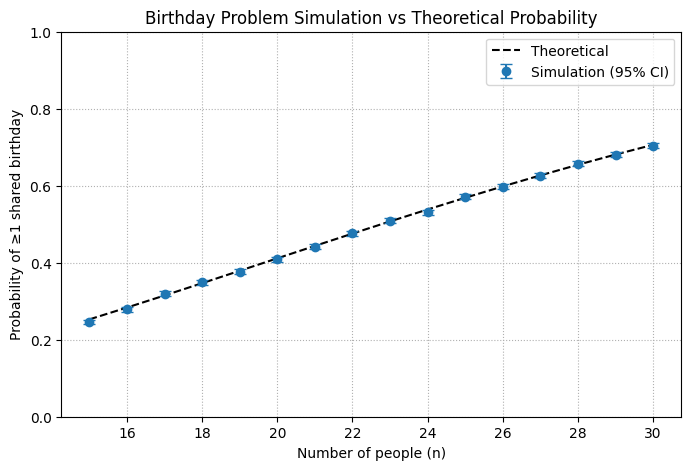

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from math import prod


def p_theoretical(n, days=365):
    return 1 - prod([(days - k) / days for k in range(n)])


days = 365
n_values = np.arange(15, 31)
num_sim = 20000  # number of simulations for each n

estimates = []
conf_lower = []
conf_upper = []
theoretical = []

for n in n_values:
    birthdays = np.random.randint(0, days, (num_sim, n))
    shared = np.any(np.diff(np.sort(birthdays, axis=1), axis=1) == 0, axis=1)
    p_hat = np.mean(shared)

    se = np.sqrt(p_hat * (p_hat - 1) / num_sim * (-1)) if p_hat not in [0,1] else 0
    z = 1.96
    lower = max(0, p_hat - z * se)
    upper = min(1, p_hat + z * se)

    estimates.append(p_hat)
    conf_lower.append(lower)
    conf_upper.append(upper)
    theoretical.append(p_theoretical(n))

# Plot
plt.figure(figsize=(8,5))
plt.plot(n_values, theoretical, color='black', linestyle='--', label='Theoretical')
plt.errorbar(n_values, estimates,
             yerr=[np.array(estimates)-np.array(conf_lower), np.array(conf_upper)-np.array(estimates)],
             fmt='o', capsize=4, label='Simulation (95% CI)')
plt.title("Birthday Problem Simulation vs Theoretical Probability")
plt.xlabel("Number of people (n)")
plt.ylabel("Probability of ≥1 shared birthday")
plt.ylim(0,1)
plt.legend()
plt.grid(True, linestyle=':')
plt.show()


<hr>

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)

<hr>

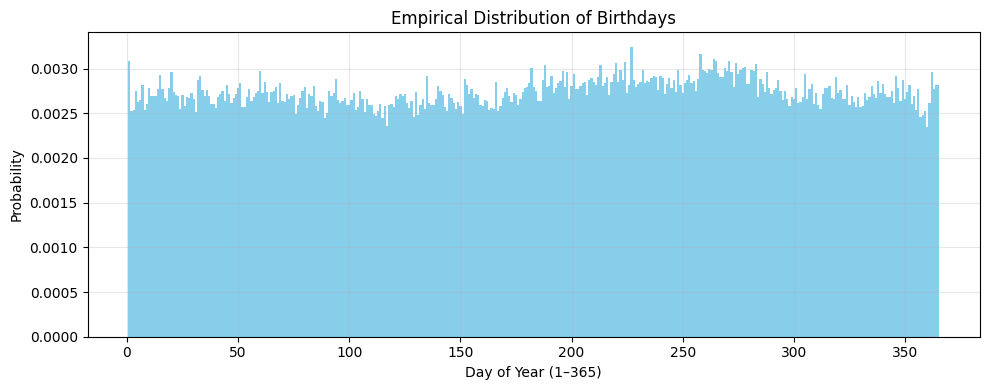

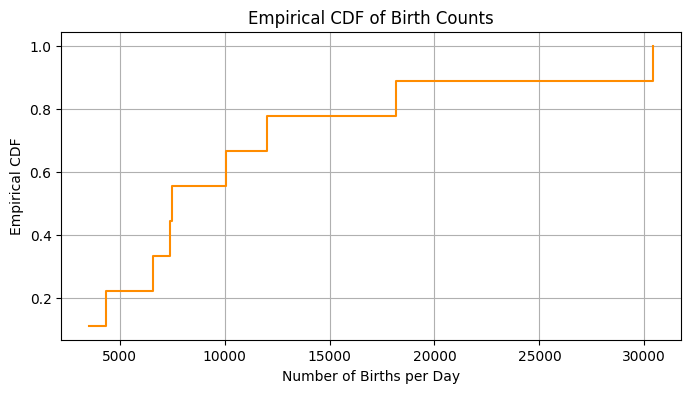

In [64]:
## Plot histogram
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("bdaydata.txt", skiprows=1)
days = np.arange(1, 366)
births = data[:, 1]

births_prob = births / np.sum(births)

plt.figure(figsize=(10, 4))
plt.bar(days, births_prob, width=1.0, color="skyblue", edgecolor="none")
plt.title("Empirical Distribution of Birthdays")
plt.xlabel("Day of Year (1–365)")
plt.ylabel("Probability")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Empirical CDF
sorted_counts = np.sort(counts)
n = len(sorted_counts)
cdf_vals = np.arange(1, n+1) / n

plt.figure(figsize=(8,4))
plt.plot(sorted_counts, cdf_vals, drawstyle='steps-post', color='darkorange')
plt.title("Empirical CDF of Birth Counts")
plt.xlabel("Number of Births per Day")
plt.ylabel("Empirical CDF")
plt.grid(True)
plt.show()


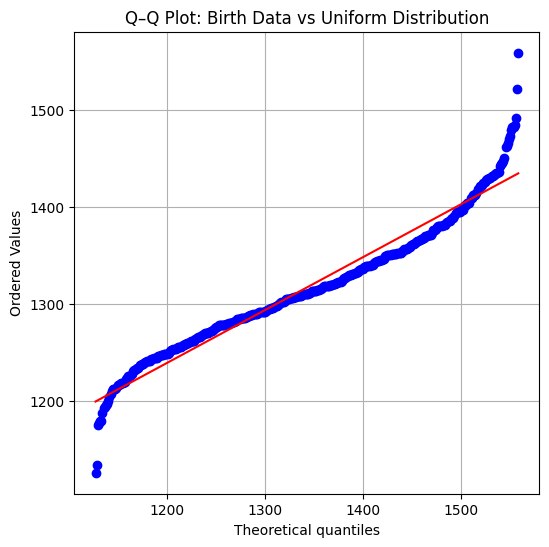

In [65]:
## Q-Q plot


theoretical = np.linspace(np.min(births), np.max(births), n)
empirical_sorted = np.sort(births)

plt.figure(figsize=(6,6))
stats.probplot(births, dist="uniform", sparams=(np.min(births), np.ptp(births)), plot=plt)
plt.title("Q–Q Plot: Birth Data vs Uniform Distribution")
plt.grid(True)
plt.show()


## Ans.

<hr>

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

<hr>

## Ans.


In [66]:
import numpy as np
import pandas as pd
from scipy import stats


bday = pd.read_csv("bdaydata.txt", sep=r"\s+", header=0)
births = bday.iloc[:, 1].to_numpy(dtype=float)

total = births.sum()
expected = np.full_like(births, total / len(births))

chi_stat, chi_p = stats.chisquare(f_obs=births, f_exp=expected)
dof = len(births) - 1

print("Chi-Square Goodness-of-Fit Test")
print(f"  Statistic = {chi_stat:.3f}")
print(f"  Degrees of freedom = {dof}")
print(f"  p-value = {chi_p:.3e}")

Chi-Square Goodness-of-Fit Test
  Statistic = 1352.723
  Degrees of freedom = 364
  p-value = 1.249e-113


In [67]:
## K-S test

day_ids = np.repeat(np.arange(1, 366), births.astype(int))
sample_scaled = day_ids / 365.0  # scale to [0, 1] for uniform test

ks_stat, ks_p = stats.kstest(sample_scaled, 'uniform', args=(0, 1))

print("\nKolmogorov–Smirnov Test")
print(f"  KS statistic = {ks_stat:.4f}")
print(f"  p-value = {ks_p:.3e}")
print(f"  Sample size = {len(sample_scaled)}")



Kolmogorov–Smirnov Test
  KS statistic = 0.0155
  p-value = 7.950e-101
  Sample size = 480715


<hr>

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

<hr>

## Ans.


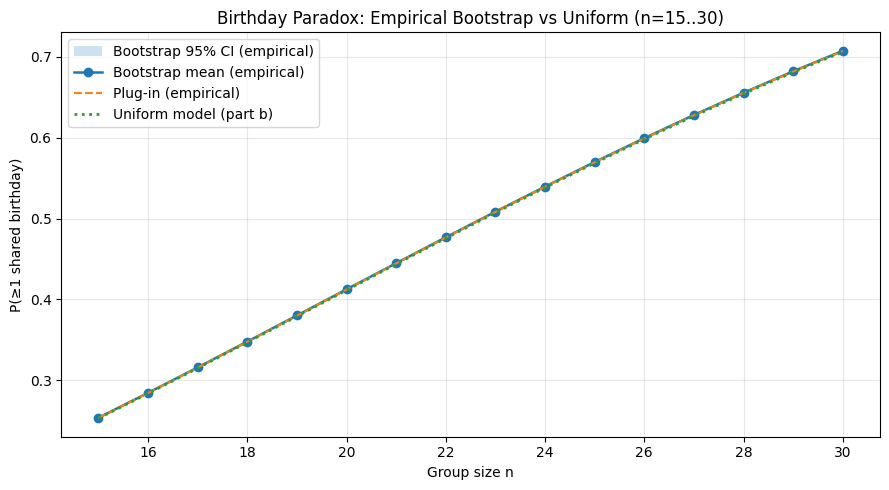

In [70]:
# ==============================================
# Q3(e) — FAST solution (no slow simulations)
# Exact P(≥1 shared) via polynomial DP + Dirichlet bootstrap
# ==============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial

df = pd.read_csv("bdaydata.txt", sep=r"\s+", header=None)
counts = df.iloc[1:, 1].to_numpy(dtype=float)
N = int(counts.sum())
p_emp = counts / N   # empirical probabilities over 365 days

def prob_shared_exact(p_vec, n_vals):
    K = int(np.max(n_vals))
    coeff = np.array([1.0], dtype=float)   # starts as 1
    for pi in p_vec:
        coeff = np.convolve(coeff, np.array([1.0, pi], dtype=float))
        if coeff.size > K + 1:             # trim degrees > K
            coeff = coeff[:K+1]
    out = []
    for n in n_vals:
        e_n = coeff[int(n)] if int(n) < coeff.size else 0.0
        p_no = factorial(int(n)) * e_n
        p_no = min(max(p_no, 0.0), 1.0)    # numerical guard
        out.append(1.0 - p_no)
    return np.array(out, dtype=float)

# --- Uniform curve from part (b) ---
def uniform_curve(n_vals, days=365):
    vals = []
    for n in n_vals:
        if n > days:
            vals.append(1.0)
        else:
            k = np.arange(n, dtype=float)
            p_no = np.prod((days - k) / days)
            vals.append(1.0 - p_no)
    return np.array(vals, dtype=float)

# --- Bootstrap over probabilities (Dirichlet; fast & stable) ---
def bootstrap_band(n_vals, counts, B=800, rng_seed=2025):
    rng = np.random.default_rng(rng_seed)
    alpha = counts + 1.0         # Dirichlet parameters
    boot = np.empty((B, len(n_vals)), dtype=float)
    for b in range(B):
        p_star = rng.dirichlet(alpha)
        boot[b, :] = prob_shared_exact(p_star, n_vals)
    mean = boot.mean(axis=0)
    lo, hi = np.percentile(boot, [2.5, 97.5], axis=0)
    return mean, lo, hi

# --- Run for n = 15..30 ---
n_vals = np.arange(15, 31)
plug_in = prob_shared_exact(p_emp, n_vals)
boot_mean, ci_lo, ci_hi = bootstrap_band(n_vals, counts, B=600)  # adjust B if you want even faster
uni = uniform_curve(n_vals)

# --- Plot ---
plt.figure(figsize=(9,5))
plt.fill_between(n_vals, ci_lo, ci_hi, alpha=0.22, label='Bootstrap 95% CI (empirical)')
plt.plot(n_vals, boot_mean, 'o-', lw=1.8, label='Bootstrap mean (empirical)')
plt.plot(n_vals, plug_in, '--', lw=1.5, label='Plug-in (empirical)')
plt.plot(n_vals, uni, ':', lw=2.0, label='Uniform model (part b)')
plt.xlabel('Group size n'); plt.ylabel('P(≥1 shared birthday)')
plt.title('Birthday Paradox: Empirical Bootstrap vs Uniform (n=15..30)')
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

<hr><hr>

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



<hr>

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials, or write your own.

<hr>

## Ans.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


N = 1500
k = np.arange(1, N + 1, dtype=np.float64)
log_factorial_prefix = np.cumsum(np.log10(k))                 # log10(n!)
frac = log_factorial_prefix - np.floor(log_factorial_prefix)  # fractional part
leading_vals = 10 ** frac
leading_digits = np.floor(leading_vals + 1e-12).astype(int)   # 1..9

# --- empirical frequencies ---
counts = np.bincount(leading_digits, minlength=10)[1:10]
empirical = counts / counts.sum()

# --- Benford expected frequencies ---
digits = np.arange(1, 10)
benford = np.log10(1 + 1/digits)

# --- print a small table ---
print("Digit : Empirical  |  Benford")
for d, e, b in zip(digits, empirical, benford):
    print(f"  {d:>1}   :  {e:7.4f}   |  {b:7.4f}")

# --- plot ---
plt.figure(figsize=(7,4.5))
plt.bar(digits, empirical, width=0.8, alpha=0.8, label="Empirical (n!)")
plt.plot(digits, benford, marker='o', linewidth=2, label="Benford expected")
plt.xticks(digits)
plt.xlabel("Leading digit")
plt.ylabel("Proportion")
plt.title("Leading digits of n! for n = 1..1500 vs. Benford's Law")
plt.legend()
plt.tight_layout()
plt.show()


<hr>

**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

<hr>

## Ans.

In [ ]:
# (b) Chi-square test: leading digits of n! vs uniform(1..9)

import numpy as np
from scipy.stats import chisquare


N = 1500
k = np.arange(1, N + 1, dtype=np.float64)
log_factorial_prefix = np.cumsum(np.log10(k))
frac = log_factorial_prefix - np.floor(log_factorial_prefix)
leading_vals = 10 ** frac
leading_digits = np.floor(leading_vals + 1e-12).astype(int)

# observed counts
observed = np.bincount(leading_digits, minlength=10)[1:10]

# expected counts under uniform distribution (each digit equally likely)
expected = np.ones(9) * observed.sum() / 9

# --- Chi-square test ---
chi2_stat, p_val = chisquare(f_obs=observed, f_exp=expected)

print("Chi-square statistic:", round(chi2_stat, 4))
print("Degrees of freedom:", len(observed) - 1)
print("p-value:", round(p_val, 6))

# --- interpretation ---
if p_val < 0.05:
    print("\nReject H₀: The leading digits are *not* uniformly distributed.")
else:
    print("\nFail to reject H₀: Data is consistent with a uniform model.")


<hr>

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


<hr>

In [ ]:
# (c) Chi-square test: leading digits of n! vs Benford's Law

import numpy as np
from scipy.stats import chisquare

# --- Recompute or reuse leading digits ---
N = 1500
k = np.arange(1, N + 1, dtype=np.float64)
log_factorial_prefix = np.cumsum(np.log10(k))
frac = log_factorial_prefix - np.floor(log_factorial_prefix)
leading_vals = 10 ** frac
leading_digits = np.floor(leading_vals + 1e-12).astype(int)

# observed counts
observed = np.bincount(leading_digits, minlength=10)[1:10]

# --- Expected counts under Benford's Law ---
digits = np.arange(1, 10)
p_benford = np.log10(1 + 1 / digits)  # Benford probabilities
expected = p_benford * observed.sum()  # scale to sample size

# --- Chi-square test ---
chi2_stat, p_val = chisquare(f_obs=observed, f_exp=expected)

print("Chi-square statistic:", round(chi2_stat, 4))
print("Degrees of freedom:", len(observed) - 1)
print("p-value:", round(p_val, 6))

# --- Interpretation ---
if p_val < 0.05:
    print("\nReject H₀: Data does *not* perfectly follow Benford’s Law.")
else:
    print("\nFail to reject H₀: Data is consistent with Benford’s Law.")


<hr>

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.

<hr>

## Ans.

In [ ]:
# (d) US Population data: test Uniform vs Benford's Law

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# --- Load dataset ---
df = pd.read_csv("us_pop.csv")   # assumes the file is in your Colab environment
data = df.iloc[:, 0].to_numpy(dtype=np.float64)  # use first column if unnamed

# --- Extract leading digits ---
# remove zeros / negatives just in case
data = data[data > 0]
leading_digits = np.floor(10 ** (np.log10(data) % 1)).astype(int)

# --- Empirical frequencies ---
counts = np.bincount(leading_digits, minlength=10)[1:10]
empirical = counts / counts.sum()
digits = np.arange(1, 10)

# --- Expected distributions ---
p_uniform = np.ones(9) / 9
p_benford = np.log10(1 + 1 / digits)

# --- Chi-square tests ---
chi2_uniform, p_uniform_val = chisquare(f_obs=counts, f_exp=p_uniform * counts.sum())
chi2_benford, p_benford_val = chisquare(f_obs=counts, f_exp=p_benford * counts.sum())

# --- Print results ---
print("Uniform model:")
print(f"  Chi-square statistic = {chi2_uniform:.4f}")
print(f"  p-value = {p_uniform_val:.6f}\n")

print("Benford's Law model:")
print(f"  Chi-square statistic = {chi2_benford:.4f}")
print(f"  p-value = {p_benford_val:.6f}\n")

# --- Interpretation ---
if p_benford_val > 0.05:
    print(" The data fits Benford’s Law well (fail to reject H₀).")
else:
    print("The data does NOT fit Benford’s Law (reject H₀).")

# --- Plot histogram ---
plt.figure(figsize=(8,5))
plt.bar(digits, empirical, alpha=0.7, label='Empirical (US Pop)')
plt.plot(digits, p_benford, 'o-', label='Benford Expected', linewidth=2)
plt.plot(digits, p_uniform, 's--', label='Uniform Expected', linewidth=1.5)
plt.xlabel("Leading digit")
plt.ylabel("Proportion")
plt.title("Leading Digits of US Population by ZIP Code (2010)")
plt.legend()
plt.tight_layout()
plt.show()


**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.

### (e) Understanding the Origin of Benford’s Law

When a positive random variable \( X \) spans *many orders of magnitude* (for example \( 0 < X < 10^6 \)),  
it’s more realistic to assume that \( \log_{10}(X) \) is **uniformly distributed** over some long interval \([0, K]\)  
instead of \( X \) itself being uniform.

Let  
$$
Y = \log_{10}(X).
$$

If \( Y \sim \text{Uniform}[0, K] \), then its **fractional part**
$$
U = Y - \lfloor Y \rfloor
$$
is uniformly distributed on \([0, 1]\).

---

#### 🔹 Deriving the probability for the first digit \( D \)

The first (leading) digit \( D \in \{1, 2, \ldots, 9\} \) satisfies

$$
D \times 10^k \le X < (D + 1) \times 10^k
$$

for some integer \( k \).  
Taking base-10 logs gives

$$
\log_{10}(D) + k \le Y < \log_{10}(D + 1) + k.
$$

Modulo 1 (that is, looking at the fractional part \( U \)), this means

$$
U \in [\log_{10}(D), \, \log_{10}(D + 1)).
$$

Since \( U \sim \text{Uniform}[0,1] \), the probability is the length of this interval:

$$
\boxed{
P(D = d) = \log_{10}(d + 1) - \log_{10}(d)
= \log_{10}\!\left(1 + \frac{1}{d}\right),
\quad d = 1, 2, \ldots, 9.
}
$$


